In [1]:
!nvidia-smi

Mon Mar 11 05:42:07 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Quadro RTX 8000                Off |   00000000:18:00.0 Off |                  Off |
| 34%   34C    P8             11W /  260W |       5MiB /  49152MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="Ss1j0YPJJbz42COV93mO")
project = rf.workspace("dance-ybkzm").project("itri_dance_sit")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.23, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to ITRI_dance_Sit-1 in yolov8:: 100%|██████████| 2252/2252 [00:04<00:00, 494.26it/s]


In [5]:
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=50 imgsz=640
# !yolo task=detect mode=train model=yolov8x.pt data=/root/Work/itri_dance/ITRI_dance-5/data.yaml epochs=50 imgsz=640


New https://pypi.org/project/ultralytics/8.1.25 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.23 🚀 Python-3.11.6 torch-2.1.2+cu121 CUDA:0 (Quadro RTX 8000, 48586MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/root/Work/itri_dance/ITRI_dance_Sit-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, e

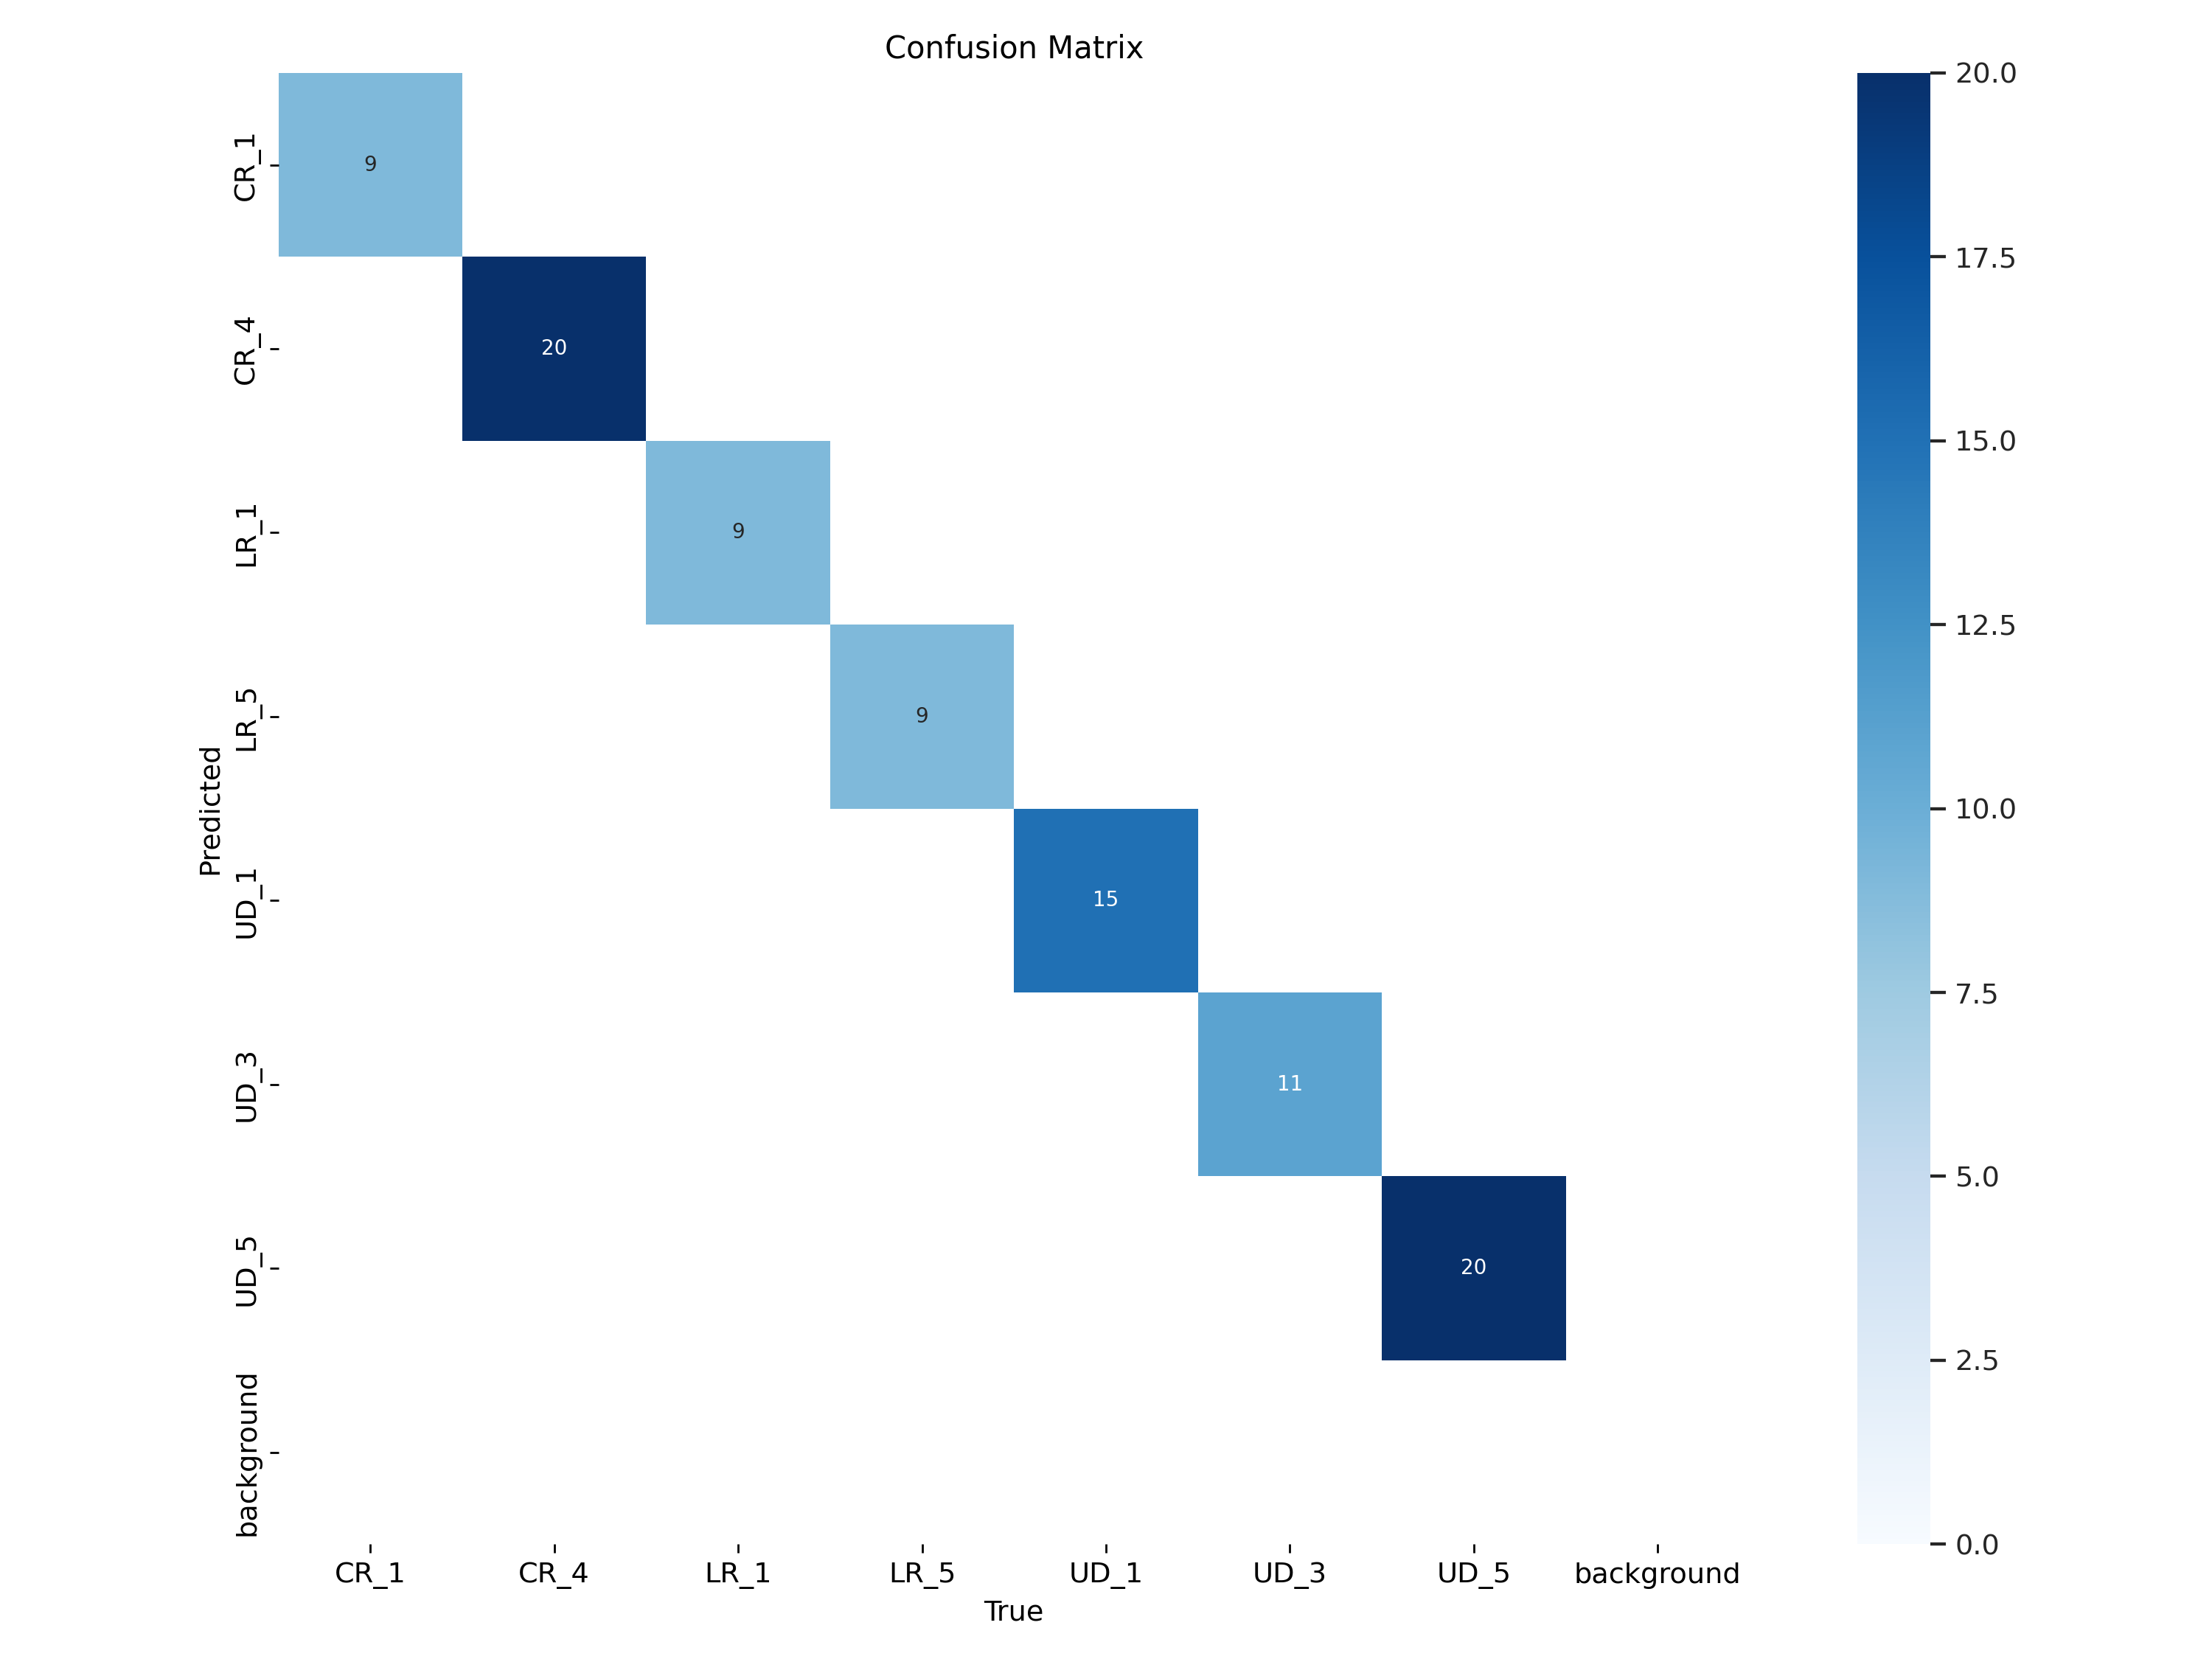

In [6]:
Image(filename=f'/root/.pyenv/runs/detect/train14/confusion_matrix.png', width=800)

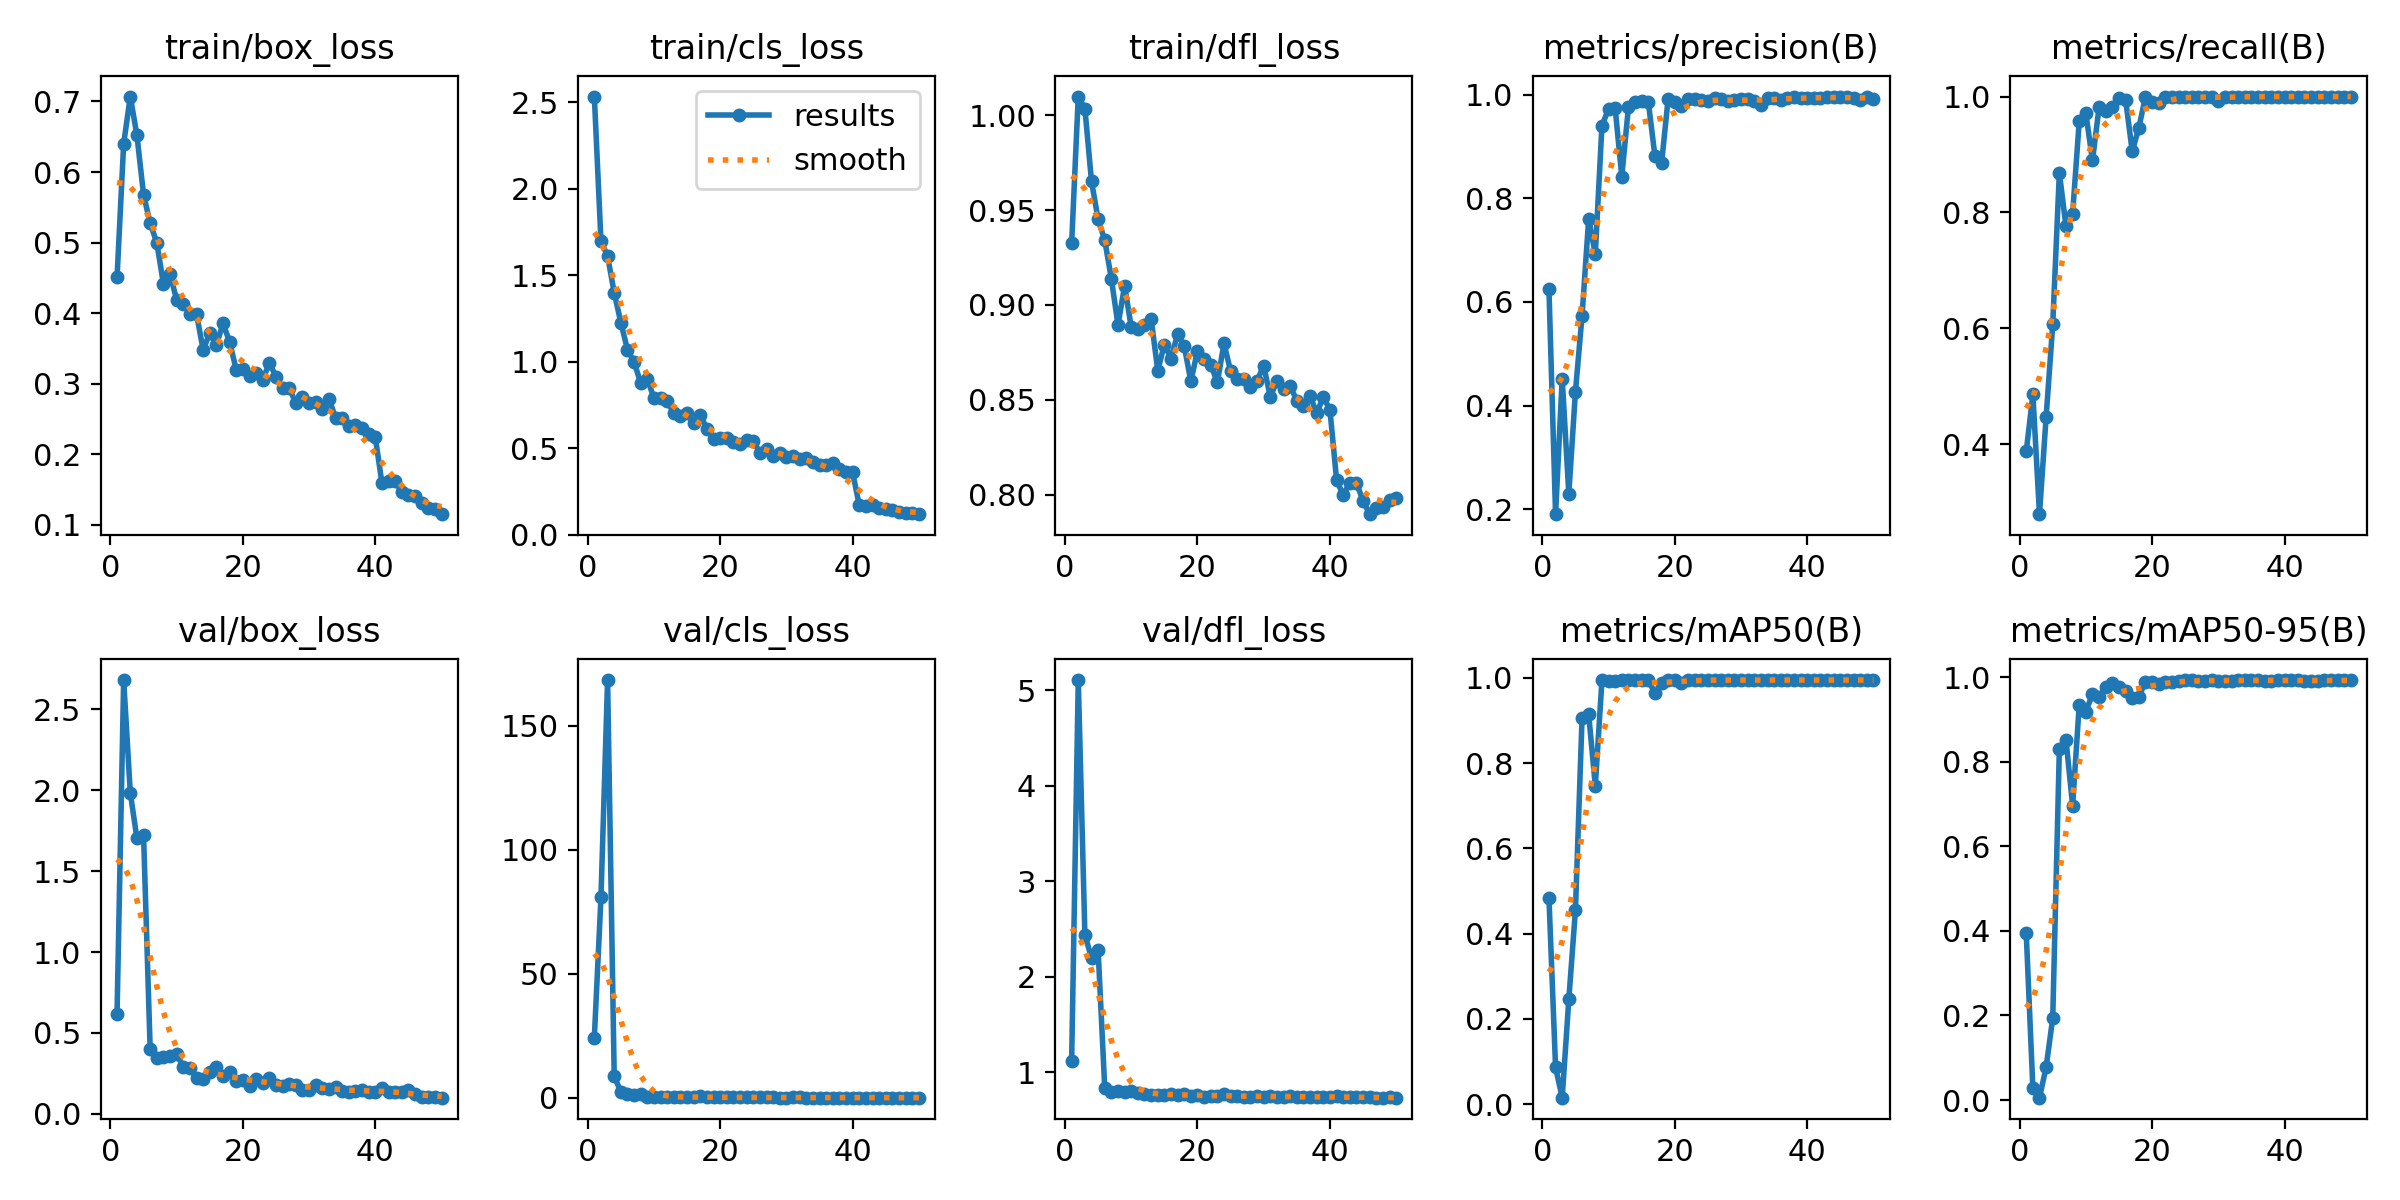

In [7]:
Image(filename=f'/root/.pyenv/runs/detect/train14/results.png', width=900)

In [8]:
# !yolo task=detect mode=val model=/root/.pyenv/runs/detect/train5/weights/best.pt data=/root/Work/itri_dance/ITRI_dance-5/data.yaml
!yolo task=detect mode=val model=/root/.pyenv/runs/detect/train14/weights/best.pt data={dataset.location}/data.yaml


Ultralytics YOLOv8.1.23 🚀 Python-3.11.6 torch-2.1.2+cu121 CUDA:0 (Quadro RTX 8000, 48586MiB)
Model summary (fused): 268 layers, 68130309 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /root/Work/itri_dance/ITRI_dance_Sit-1/valid/labels.cache... 93 im
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         93         93      0.993          1      0.995      0.993
                  CR_1         93          9      0.991          1      0.995      0.995
                  CR_4         93         20      0.997          1      0.995      0.995
                  LR_1         93          9      0.993          1      0.995      0.995
                  LR_5         93          9      0.991          1      0.995      0.995
                  UD_1         93         15      0.993          1      0.995      0.982
                  UD_3         93         11      0.991          1      0.995      0.995
                  UD_5         93       

In [9]:
!yolo task=detect mode=predict model=/root/.pyenv/runs/detect/train14/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true
# !yolo task=detect mode=predict model=/home/wwlouis/.pyenv/runs/detect/train5/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.1.23 🚀 Python-3.11.6 torch-2.1.2+cu121 CUDA:0 (Quadro RTX 8000, 48586MiB)
Model summary (fused): 268 layers, 68130309 parameters, 0 gradients, 257.4 GFLOPs

image 1/46 /root/Work/itri_dance/ITRI_dance_Sit-1/test/images/IMG_8730_MOV-0022_jpg.rf.d4fa3be6fc7babe1e5835e68f5edc6a9.jpg: 640x640 1 CR_4, 27.9ms
image 2/46 /root/Work/itri_dance/ITRI_dance_Sit-1/test/images/IMG_8730_MOV-0028_jpg.rf.68b576441d7bb5b5b0b4b8cb9e2191e5.jpg: 640x640 1 CR_4, 27.7ms
image 3/46 /root/Work/itri_dance/ITRI_dance_Sit-1/test/images/IMG_8730_MOV-0038_jpg.rf.2f0ad87c640ace02b629551e30603565.jpg: 640x640 1 CR_4, 27.6ms
image 4/46 /root/Work/itri_dance/ITRI_dance_Sit-1/test/images/IMG_8730_MOV-0052_jpg.rf.fc07b75c93b7a86efd824dafd6b2f3bb.jpg: 640x640 1 CR_4, 27.6ms
image 5/46 /root/Work/itri_dance/ITRI_dance_Sit-1/test/images/IMG_8731_MOV-0001_jpg.rf.3243d4fe4d1a23fe4d4d50047e4eca8a.jpg: 640x640 1 CR_4, 26.9ms
image 6/46 /root/Work/itri_dance/ITRI_dance_Sit-1/test/images/IMG_8731_MOV-0008_jpg.

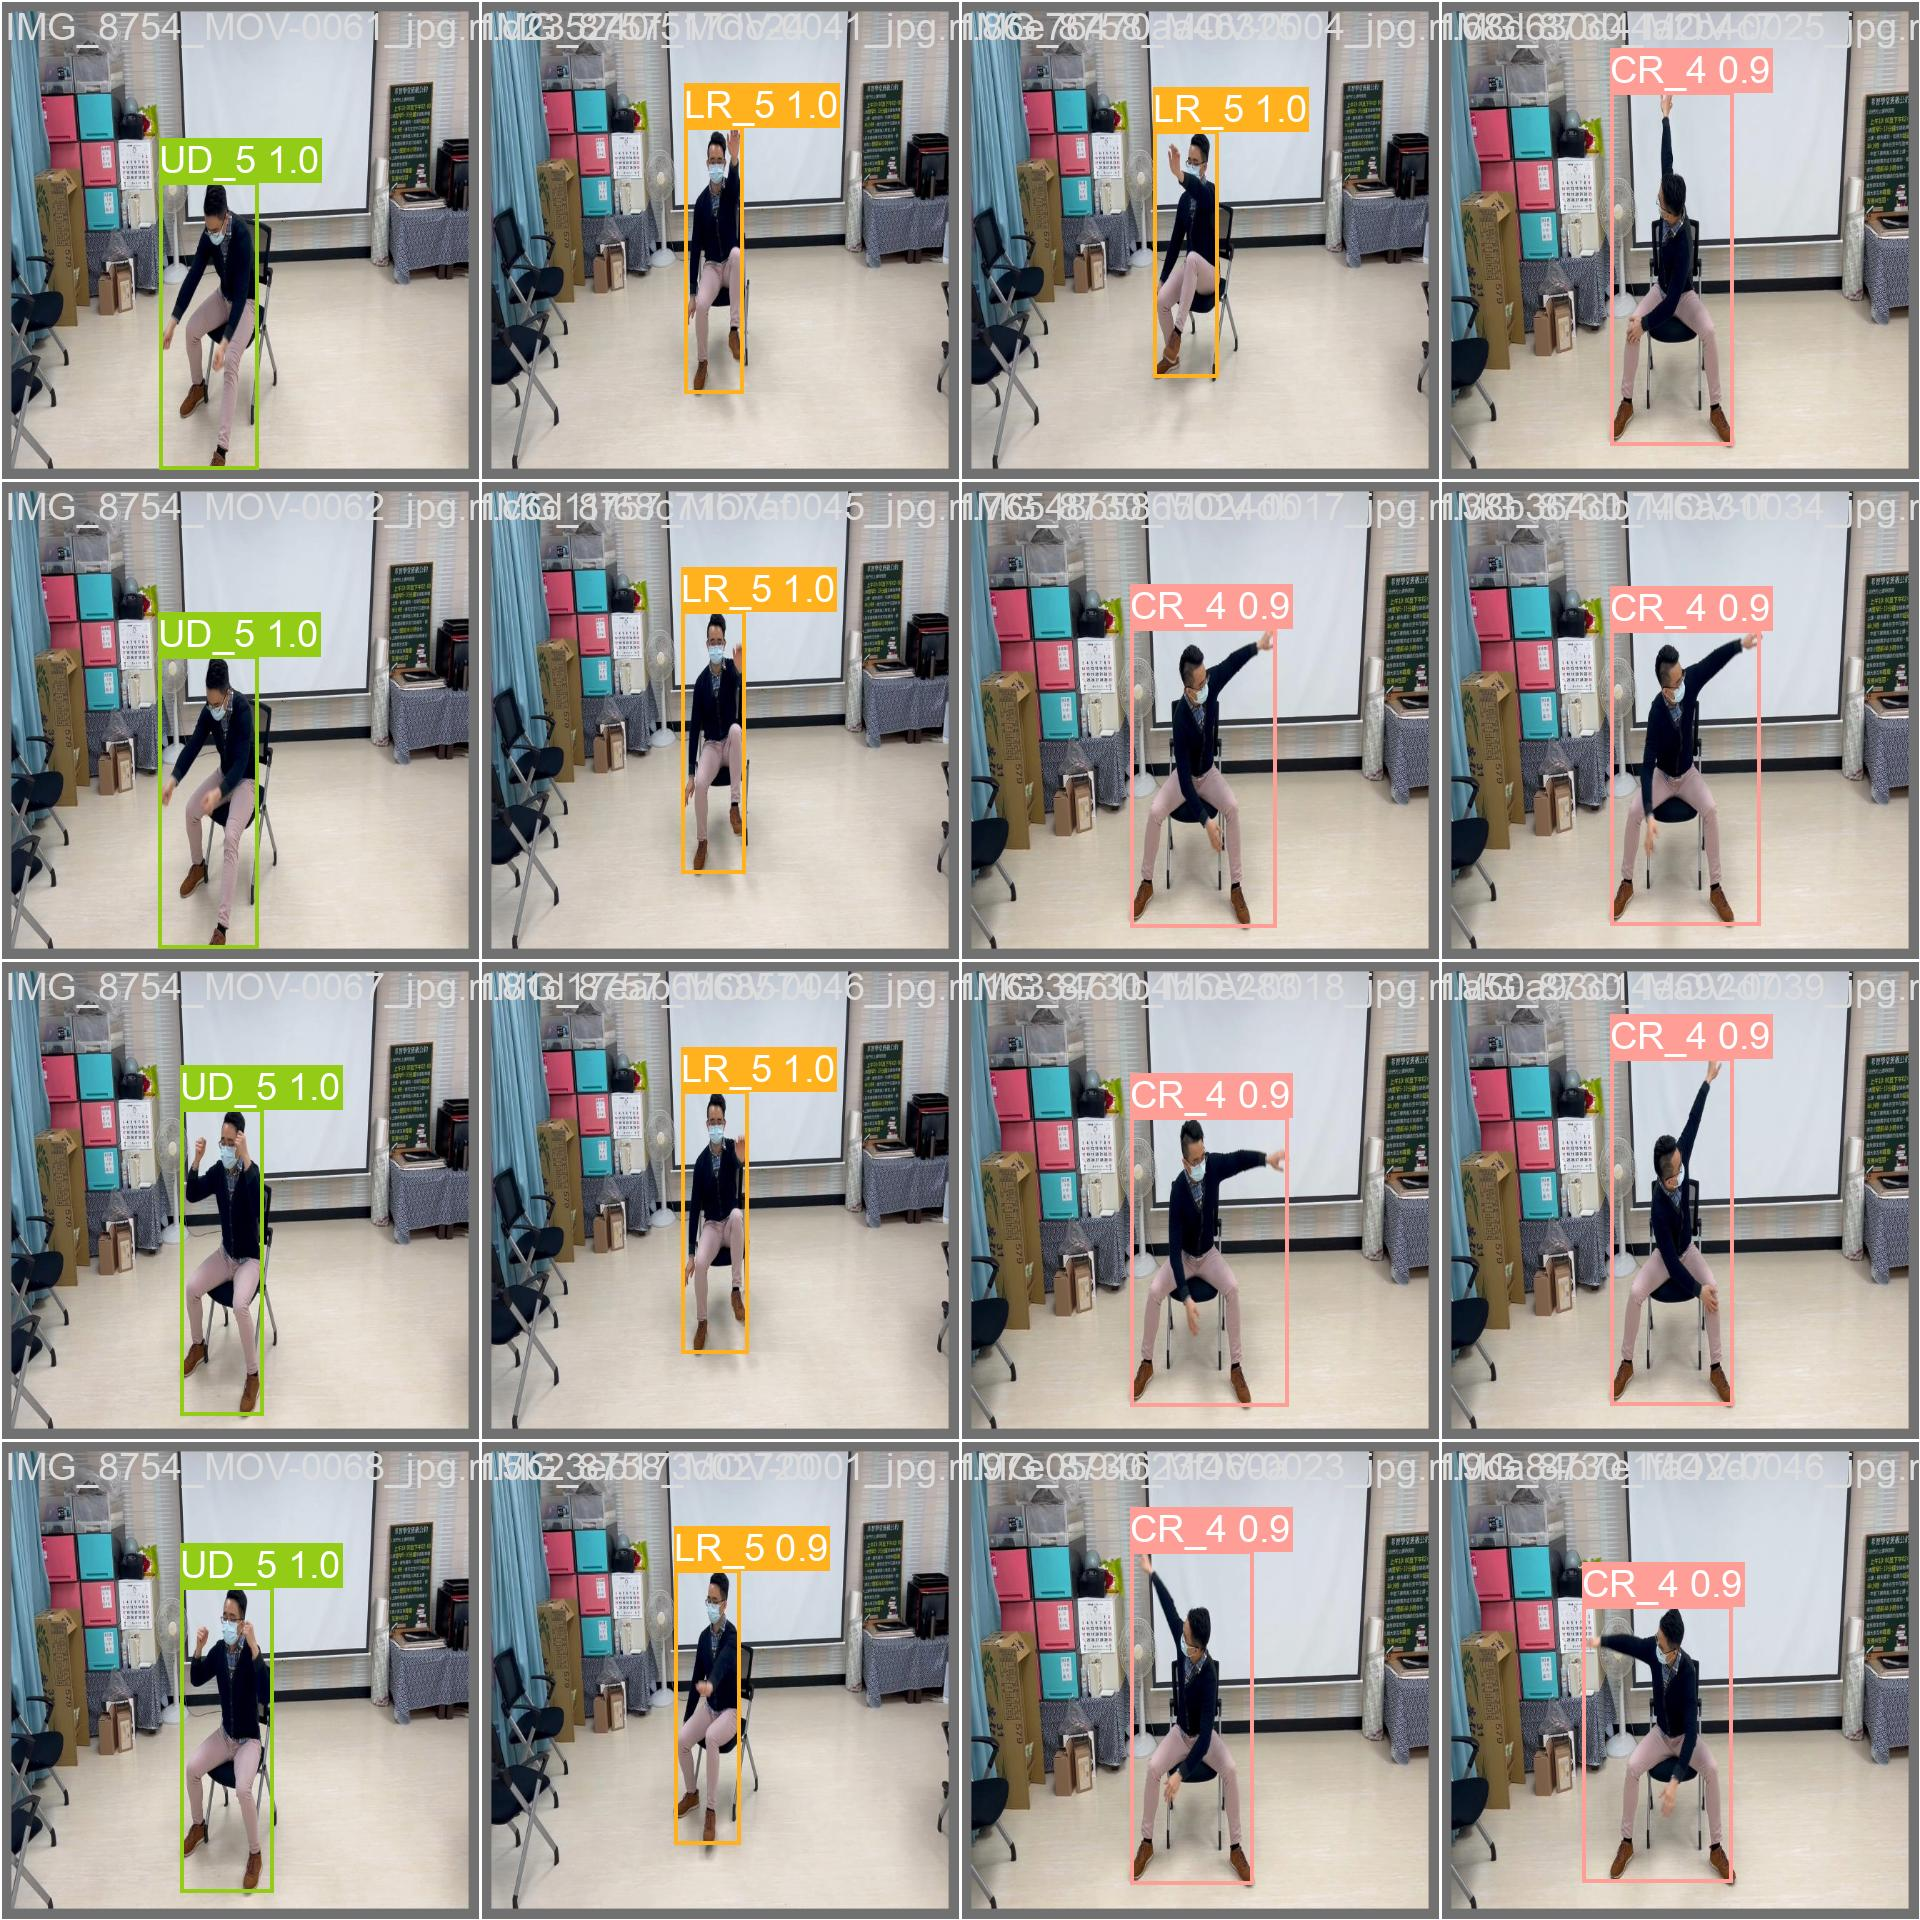

In [10]:
Image(filename=f'/root/.pyenv/runs/detect/train14/val_batch0_pred.jpg', width=900)

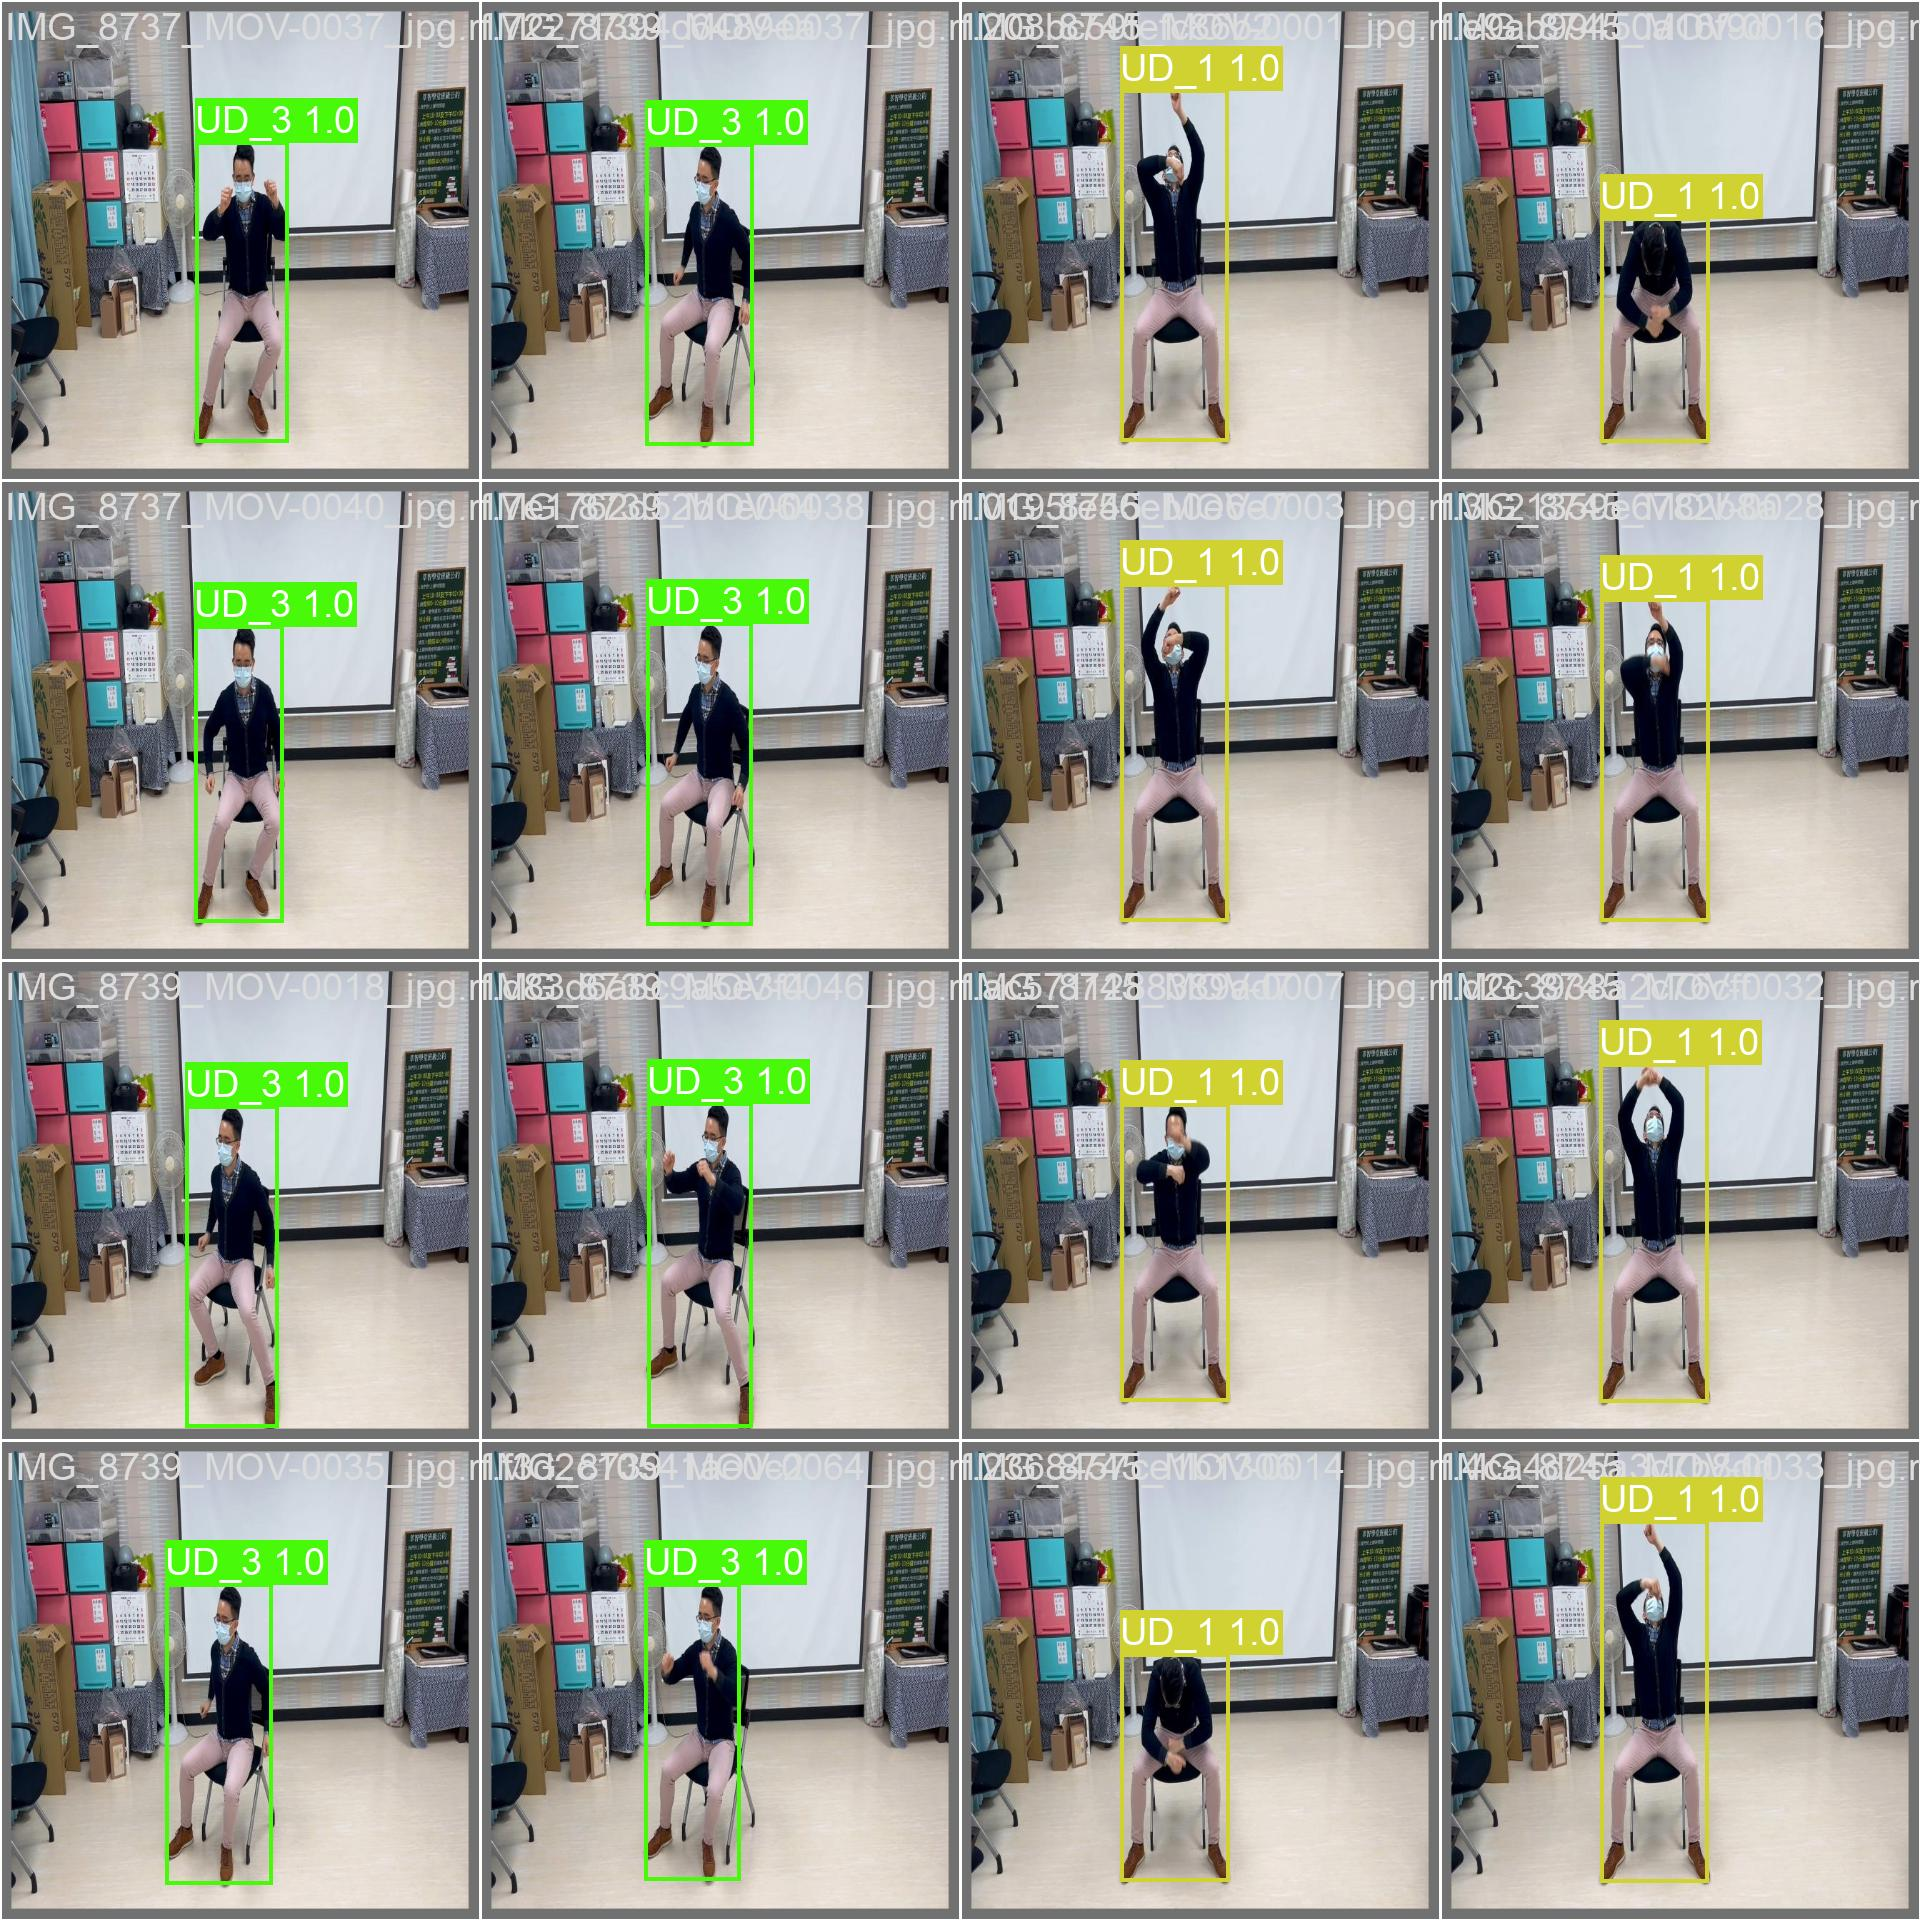

In [11]:
Image(filename=f'/root/.pyenv/runs/detect/train14/val_batch1_pred.jpg', width=900)